In [140]:
'''
We import the most important libraries we are going to use
'''

#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 

color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

RANDOM_STATE = 10

In [141]:
file_path = "./arrhythmia.data"
# above .data file is comma delimited
pacient_data = pd.read_csv(file_path, delimiter=",", header=None)

## Data Preprocessing

### Clean Data
Convert from multiclass to two classes.

In [142]:
y_train = pacient_data.iloc[:,-1]

y_train = y_train.replace([1],0)
y_train = y_train.replace([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 1)

y_train.head()

0    1
1    1
2    1
3    0
4    1
Name: 279, dtype: int64

### Search for Null Values if any and look for unrealistic data

In [144]:
(pd.DataFrame(pacient_data.isnull().sum(),columns=["Count"])).sum()

Count    0
dtype: int64

In [145]:
pacient_data.describe()

,0,1,2,3,4,5,6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.0,452.000000,452.0,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.0,452.0,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.1

In [146]:
pd.set_option('display.max_rows', 300)
print(pacient_data.dtypes.head(285))
pd.set_option('display.max_rows', 20)

0        int64
1        int64
2        int64
3        int64
4        int64
5        int64
6        int64
7        int64
8        int64
9        int64
10      object
11      object
12      object
13      object
14      object
15       int64
16       int64
17       int64
18       int64
19       int64
20       int64
21       int64
22       int64
23       int64
24       int64
25       int64
26       int64
27       int64
28       int64
29       int64
30       int64
31       int64
32       int64
33       int64
34       int64
35       int64
36       int64
37       int64
38       int64
39       int64
40       int64
41       int64
42       int64
43       int64
44       int64
45       int64
46       int64
47       int64
48       int64
49       int64
50       int64
51       int64
52       int64
53       int64
54       int64
55       int64
56       int64
57       int64
58       int64
59       int64
60       int64
61       int64
62       int64
63       int64
64       int64
65       int64
66       i

In [147]:
pacient_data.iloc[:,-1] = y_train
classification = pacient_data.iloc[:,-1]
print(pacient_data.shape)
print(classification)

(452, 280)
0      1
1      1
2      1
3      0
4      1
      ..
447    0
448    1
449    1
450    0
451    0
Name: 279, Length: 452, dtype: int64


In [148]:
newColumns = ["Age","Sex","Height","Weight","QRS Duration","P-R Interval","Q-T interval","T interval","P interval","QRS",
       "T","P","QRST","J","Heart Rate","Q Wave","R Wave","S Wave"]

for x in range(18,279):
    newColumns.append(str(x))

newColumns.append('Classification')

### Drop columns with many scpecial characters

In [149]:
pacient_data.columns = newColumns

pacient_data = pacient_data.drop(['J'], axis=1)

pacient_data.head(10)

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,Heart Rate,Q Wave,R Wave,S Wave,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,Classification
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,34,70,66,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,1
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0

### Drop remaining rows with special characters and unrealistic values

In [150]:
print(pacient_data.columns)
print(pacient_data.dtypes.head(20))
# sorting dataframe
pacient_data.sort_values("Age", inplace = True)

print(pacient_data.shape)

# making boolean series for a team name
filter = pacient_data["Height"]<=230
filter2 = pacient_data["T"] != "?"
filter3 = pacient_data["P"] != "?"
filter4 = pacient_data["QRST"] != "?"
filter5 = pacient_data["Heart Rate"] != "?"

# filtering data
pacient_data.where(filter & filter2 & filter3 & filter4 & filter5, inplace = True)

Index(['Age', 'Sex', 'Height', 'Weight', 'QRS Duration', 'P-R Interval',
       'Q-T interval', 'T interval', 'P interval', 'QRS',
       ...
       '270', '271', '272', '273', '274', '275', '276', '277', '278',
       'Classification'],
      dtype='object', length=279)
Age              int64
Sex              int64
Height           int64
Weight           int64
QRS Duration     int64
P-R Interval     int64
Q-T interval     int64
T interval       int64
P interval       int64
QRS              int64
T               object
P               object
QRST            object
Heart Rate      object
Q Wave           int64
R Wave           int64
S Wave           int64
18               int64
19               int64
20               int64
dtype: object
(452, 279)


In [151]:
pacient_data.shape

(452, 279)

In [152]:
pacient_data = pacient_data.dropna()
pacient_data["Age"] = pd.Series(pacient_data["Age"], dtype=int)
pacient_data["Sex"] = pd.Series(pacient_data["Sex"], dtype=int)
print(pacient_data.shape)
print(pacient_data.head())

(418, 279)
     Age  Sex  Height  Weight  QRS Duration  P-R Interval  Q-T interval  \
60     1    0   110.0    10.0          80.0         121.0         287.0   
320    3    0   105.0    12.0          69.0         155.0         240.0   
297    7    1   130.0    30.0         131.0         161.0         377.0   
424    7    0   119.0    21.0         140.0         157.0         438.0   
403    7    1   127.0    22.0         185.0         204.0         284.0   

     T interval  P interval    QRS   T    P QRST Heart Rate  Q Wave  R Wave  \
60        156.0        67.0  126.0  25   60  104        104     0.0    28.0   
320       133.0        64.0   93.0  95   54   92        124     0.0    28.0   
297       216.0       100.0  155.0  36   55   60         87     0.0    36.0   
424       226.0        81.0  -40.0  86   29   69         70     0.0   124.0   
403       123.0        72.0 -172.0  24  176  166        122    16.0    16.0   

     S Wave   18   19    20   21   22   23   24   25   26    27

In [153]:
grouped_pacient_data = pacient_data.groupby('Classification').size()

print(grouped_pacient_data)

Classification
0.0    237
1.0    181
dtype: int64


### Balance Classes

In [154]:
pacient_data.sort_values("Classification", inplace = True)

pacient_data = pacient_data.iloc[56:,:]

grouped_pacient_data = pacient_data.groupby('Classification').size()

print(grouped_pacient_data)

pacient_data = pacient_data.sample(frac=1)

Classification
0.0    181
1.0    181
dtype: int64


In [155]:
Features = pacient_data.iloc[:, :-1]
Labels = pacient_data.iloc[:,-1]

### Divide Training and Testing Samples

In [180]:
# Make a train/test split using 20% test size
X_train, X_test, y_train, y_test = train_test_split(Features, Labels,
                                                    test_size=0.20,
                                                    random_state=RANDOM_STATE)

## Feature Selection

In [181]:
feature_selector = SelectKBest(f_classif, k=10) 
X_train_best = feature_selector.fit_transform(X_train, y_train)
X_test_best = feature_selector.transform(X_test)

C:\Users\SPARTAN PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  20  36  49  66  68  70  73  82  83  84  92 128 130 131 138 140 142
 143 144 150 155 156 163 203 263 273] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\SPARTAN PC\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## Data Normalization

In [158]:
scaler = StandardScaler()

scaler.fit(X_train_best)

X_train_best_scaled = scaler.transform(X_train_best)
X_test_best_scaled = scaler.transform(X_test_best)

## Dimensionality Reduction

In [182]:
pca = PCA(n_components=2)

pca.fit(X_train_best_scaled)

X_train_best_pca_scaled = pca.transform(X_train_best_scaled)
X_test_best_pca_scaled = pca.transform(X_test_best_scaled)

## Testing different components in PCA for Bayes

In [183]:
# Testing Naive Bayes for different components in PCA

# No PCA
classifier = GaussianNB()
classifier.fit(X_train_best_pca_scaled, y_train)
y_pred = classifier.predict(X_test_best_pca_scaled)
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Naive Bayes no PCA', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])


for x in range(2,17):
    pca = PCA(n_components=x)

    pca.fit(X_train)

    X_train_best_pca_scaled = pca.transform(X_train)
    X_test_best_pca_scaled = pca.transform(X_test)

    classifier = GaussianNB()
    classifier.fit(X_train_best_pca_scaled, y_train)
    y_pred = classifier.predict(X_test_best_pca_scaled)
    acc = accuracy_score(y_test, y_pred )
    prec = precision_score(y_test, y_pred )
    rec = recall_score(y_test, y_pred )
    f1 = f1_score(y_test, y_pred )
    f2 = fbeta_score(y_test, y_pred, beta=2.0)
    model_results = pd.DataFrame([[
    'Naive Bayes ' + str(x) + ' components', acc, prec, rec, f1, f2]],
    columns = ['Model', 'Accuracy', 'Precision',
    'Recall', 'F1 Score', 'F2 Score'])
    results = results.append(model_results, ignore_index = True)

results = results.sort_values(["Recall", 
"Precision", "Accuracy"], ascending = False)
print (results)

                        Model  Accuracy  Precision    Recall  F1 Score  \
15  Naive Bayes 16 components  0.808219   0.843750  0.750000  0.794118   
9   Naive Bayes 10 components  0.821918   0.896552  0.722222  0.800000   
11  Naive Bayes 12 components  0.808219   0.866667  0.722222  0.787879   
12  Naive Bayes 13 components  0.794521   0.838710  0.722222  0.776119   
4    Naive Bayes 5 components  0.808219   0.892857  0.694444  0.781250   
5    Naive Bayes 6 components  0.808219   0.892857  0.694444  0.781250   
10  Naive Bayes 11 components  0.808219   0.892857  0.694444  0.781250   
13  Naive Bayes 14 components  0.780822   0.833333  0.694444  0.757576   
14  Naive Bayes 15 components  0.780822   0.833333  0.694444  0.757576   
8    Naive Bayes 9 components  0.794521   0.888889  0.666667  0.761905   
6    Naive Bayes 7 components  0.780822   0.857143  0.666667  0.750000   
0          Naive Bayes no PCA  0.808219   0.958333  0.638889  0.766667   
3    Naive Bayes 4 components  0.78082

#### **EXTRA: Using K-Fold Validation to compare variance between models accuracies

In [160]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear')))
models.append(('Kernel SVM', SVC(kernel = 'rbf')))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy')))
models.append(('Adaboost', AdaBoostClassifier(n_estimators=100, random_state=0)))
models.append(('X-Gradient Boost', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
    model, X_train_best_scaled, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
    model, X_train_best_scaled, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                             round(cv_auc_results.mean()*100, 2),
                             round(cv_auc_results.std()*100, 2),
                             round(cv_acc_results.mean()*100, 2),
                             round(cv_acc_results.std()*100, 2)
                             ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
4,Gaussian NB,79.57,11.97,75.12,10.04
0,Logistic Regression,78.38,11.33,74.10,9.60
1,SVC,78.37,10.60,72.03,11.22
2,Kernel SVM,78.04,10.16,73.76,10.31
3,KNN,76.93,8.40,70.96,7.51
6,Random Forest,76.88,11.87,72.02,11.83
8,X-Gradient Boost,72.32,8.41,67.86,7.45
7,Adaboost,66.72,8.80,62.32,5.90
5,Decision Tree Classifier,61.63,9.49,63.02,10.48


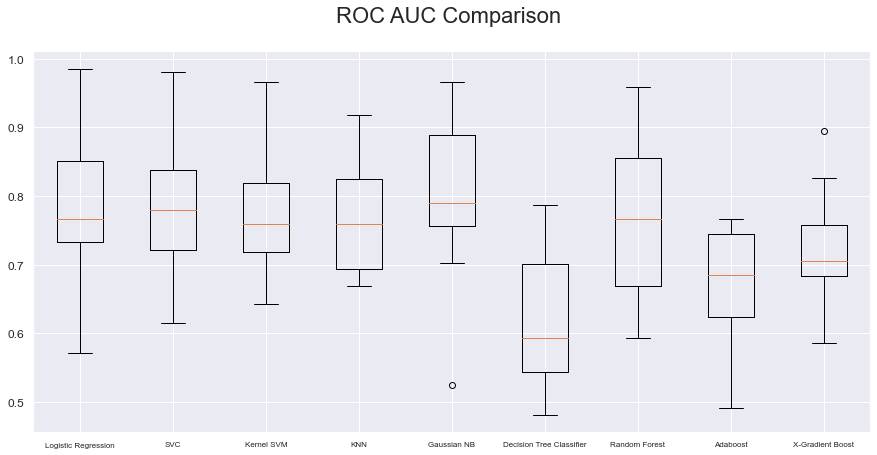

In [161]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)

ax.set_xticklabels(names)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

#plt.ylabel('ROC AUC Score\n',
#horizontalalignment="center",fontstyle = "normal",
#fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',
#orizontalalignment="center",fontstyle = "normal", 
#ontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

No handles with labels found to put in legend.


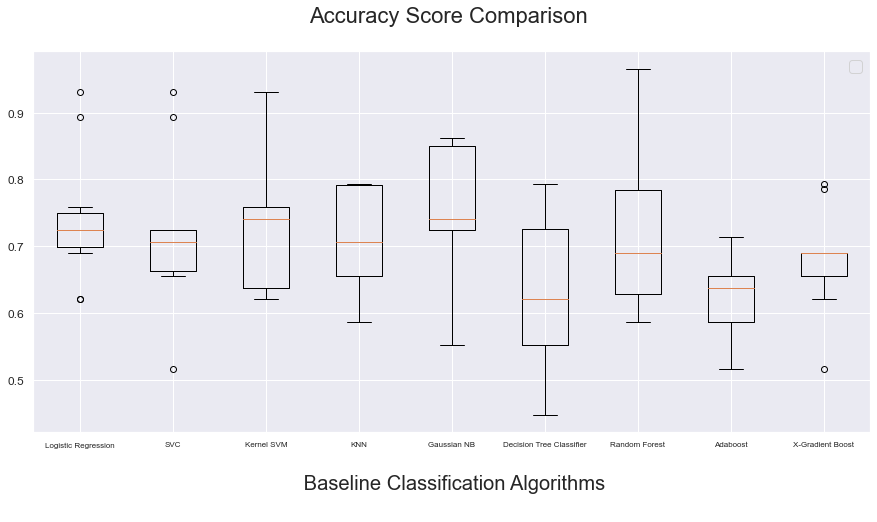

In [162]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

plt.boxplot(acc_results)
ax.set_xticklabels(names)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8) 

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)

#plt.ylabel('ROC AUC Score\n',
#horizontalalignment="center",fontstyle = "normal", 
#fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

### Getting optimal number of Neighbours for KNN

0.7671232876712328 
 21


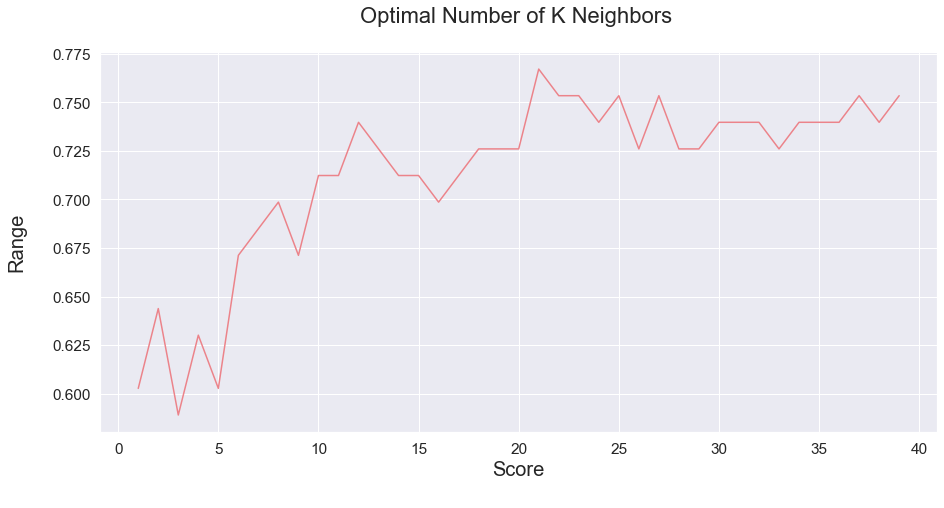

In [163]:
score_array = []
score = 0
maxScoreKNN = 0
indexKNN = 0
for each in range(1,40):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(X_train_best,y_train)
    score = knn_loop.score(X_test_best,y_test)
    score_array.append(score)
    if score > maxScoreKNN:
        indexKNN = each
        maxScoreKNN = score
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,40),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")

print(maxScoreKNN,"\n", indexKNN)

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

### Getting optimal number of estimators for Random Forest

0.863013698630137 
 24


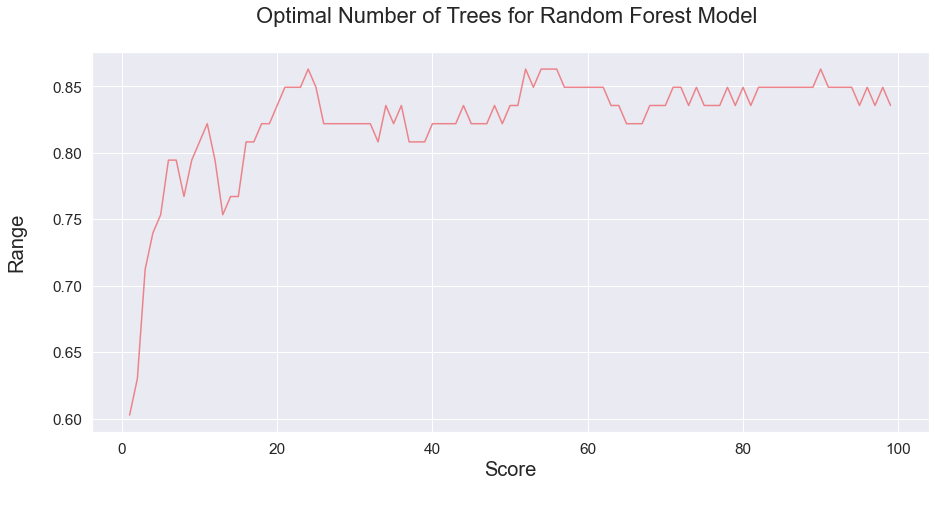

In [164]:
score_array = []
score = 0
maxScoreRF = 0
indexRF = 0
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = RANDOM_STATE) 
    rf_loop.fit(X_train,y_train)
    score = rf_loop.score(X_test,y_test)
    score_array.append(score)
    if score > maxScoreRF:
        indexRF = each
        maxScoreRF = score
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")

print(maxScoreRF,"\n", indexRF)

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

## Comparing each model using the best transformed data for them

In [165]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = RANDOM_STATE)
classifier.fit(X_train_best_scaled, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test_best_scaled)
#Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])



# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = RANDOM_STATE)
classifier.fit(X_train_best_scaled, y_train)
# Predicting the Test set results 
y_pred_svm = classifier.predict(X_test_best_scaled)
#Evaluate results
acc = accuracy_score(y_test, y_pred_svm )
prec = precision_score(y_test, y_pred_svm )
rec = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm )
f2 = fbeta_score(y_test, y_pred_svm, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)



# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = indexKNN, 
metric = 'minkowski', p = 2)
classifier.fit(X_train_best, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(X_test_best)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)



# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel = 'rbf', random_state = RANDOM_STATE)
classifier.fit(X_train_best_scaled, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test_best_scaled)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Kernel SVM', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)



# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train_best_pca_scaled, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test_best_pca_scaled)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Bayes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)



# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = RANDOM_STATE)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)




# Fitting Random Forest to the Training set:
classifier = RandomForestClassifier(n_estimators = indexRF, 
criterion = 'entropy', random_state = RANDOM_STATE)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)



# Fitting Adaboost to the Training set:
classifier = AdaBoostClassifier(n_estimators=100, random_state = RANDOM_STATE)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred_adaboost = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred_adaboost )
prec = precision_score(y_test, y_pred_adaboost )
rec = recall_score(y_test, y_pred_adaboost )
f1 = f1_score(y_test, y_pred_adaboost )
f2 = fbeta_score(y_test, y_pred_adaboost, beta=2.0)
model_results = pd.DataFrame([['Adaboost', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)




# Fitting X-Gradient Boosting to the Training set:
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=RANDOM_STATE)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred_xgradient = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred_xgradient )
prec = precision_score(y_test, y_pred_xgradient )
rec = recall_score(y_test, y_pred_xgradient )
f1 = f1_score(y_test, y_pred_xgradient )
f2 = fbeta_score(y_test, y_pred_xgradient, beta=2.0)
model_results = pd.DataFrame([['X-Gradient Boosting', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)



# Fitting Neural Network to the Training set:
classifier = MLPClassifier(random_state=RANDOM_STATE, max_iter=100, alpha=0.01)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Multi-layer Neural-Network', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)


results = results.sort_values(["Recall", 
"Precision", "Accuracy"], ascending = False)
print (results)

                        Model  Accuracy  Precision    Recall  F1 Score  \
5               Decision Tree  0.849315   0.857143  0.833333  0.845070   
8         X-Gradient Boosting  0.849315   0.878788  0.805556  0.840580   
3                  Kernel SVM  0.835616   0.852941  0.805556  0.828571   
6               Random Forest  0.808219   0.823529  0.777778  0.800000   
7                    Adaboost  0.808219   0.843750  0.750000  0.794118   
0         Logistic Regression  0.794521   0.818182  0.750000  0.782609   
1                SVM (Linear)  0.808219   0.866667  0.722222  0.787879   
9  Multi-layer Neural-Network  0.698630   0.694444  0.694444  0.694444   
4                 Naive Bayes  0.808219   0.958333  0.638889  0.766667   
2        K-Nearest Neighbours  0.767123   0.913043  0.583333  0.711864   

   F2 Score  
5  0.837989  
8  0.819209  
3  0.814607  
6  0.786517  
7  0.767045  
0  0.762712  
1  0.747126  
9  0.694444  
4  0.684524  
2  0.628743  


C:\Users\SPARTAN PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Confusion Matrixes for best models

Text(0.5, 8.5, 'Predicted Condition\n')

<Figure size 216x2160 with 0 Axes>

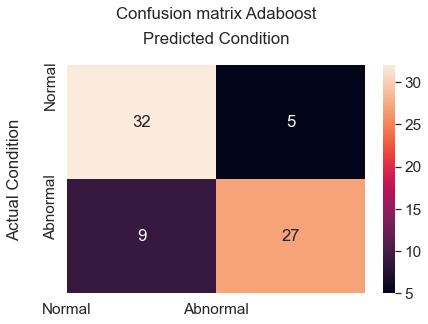

In [166]:
cm = confusion_matrix(y_test, y_pred_adaboost) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (3,30))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=["Normal","Abnormal"]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix Adaboost\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual Condition\n')
plt.xlabel('Predicted Condition\n')

Text(0.5, 8.5, 'Predicted Condition\n')

<Figure size 216x2160 with 0 Axes>

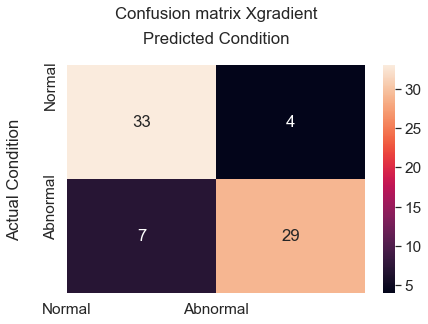

In [167]:
cm = confusion_matrix(y_test, y_pred_xgradient) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (3,30))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=["Normal","Abnormal"]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix Xgradient\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual Condition\n')
plt.xlabel('Predicted Condition\n')

Text(0.5, 8.5, 'Predicted Condition\n')

<Figure size 216x2160 with 0 Axes>

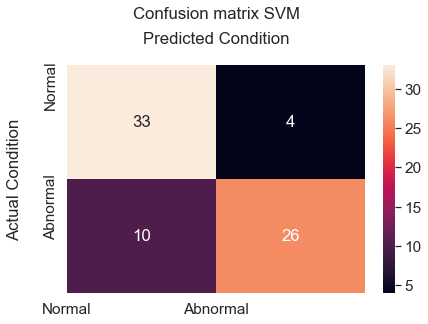

In [168]:
cm = confusion_matrix(y_test, y_pred_svm) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (3,30))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=["Normal","Abnormal"]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual Condition\n')
plt.xlabel('Predicted Condition\n')